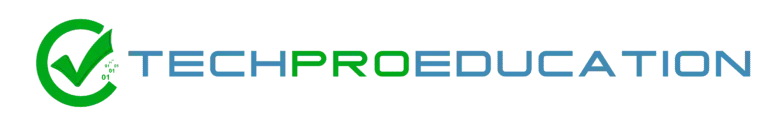

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [2]:
pwd
#buda localden aliyor fotolari

'C:\\Users\\LENOVO\\CNN'

The Dogs vs. Cats dataset is a common computer vision dataset in which pictures are classified as either including a dog or a cat.

After the dataset is well studied, it can be used to understand and practice how to design, evaluate, and apply convolutional neural networks for image classification.

You will build a classifier with images and try to detect dogs versus cats using CNN.

Train set includes 12500 cat-5026 dog images, validation set includes 1219 cat-1071 dog images and test set incgludes 6897 cat and dogs images together. 

In [ ]:
#toplamda 25 bin civarinda foto var
#amacimiz kedi ve köpek resimleri veriliyor, kedi köpek ayrimi yapmak icin

In [3]:
my_data_dir='data/'

In [4]:
os.listdir(my_data_dir)

['test', 'train', 'validation']

In [5]:
val_path = my_data_dir+'validation' #bu sinek datasindan farkli olarak var
train_path = my_data_dir+'train'
test_path = my_data_dir+'test'


In [6]:
os.listdir(train_path)

['cat', 'dog']

In [7]:
len(os.listdir(test_path))

6897

**Let's check how many images there are.**

In [8]:
len(os.listdir(train_path+'/cat'))

12500

In [9]:
len(os.listdir(train_path+'/dog'))

5026

In [10]:
os.listdir(train_path+'/cat')[0]

'cat.7447.jpg'

In [11]:
path1=train_path+'/cat'+'/cat.0.jpg'
path2=train_path+'/dog'+'/dog.1.jpg'

In [12]:
cat_img=imread(path1)
dog_img=imread(path2)

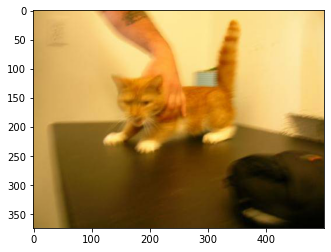

In [13]:
plt.imshow(cat_img)

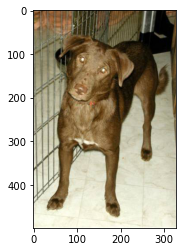

In [14]:
plt.imshow(dog_img)

**Let's decide on the final dimension of these images.**

In [15]:
cat_img.max()
#scale edilmemis 
#scale etmek icin 255 e bölüyoruz

255

In [16]:
cat_img.min()

0

In [17]:
cat_img.shape

(374, 500, 3)

In [18]:
dog_img.shape

(499, 327, 3)

In [19]:
x= []
y = []
for image in os.listdir(train_path+'/cat'):
    
    img = imread(train_path+'/cat/'+image)
    d1,d2,colors = img.shape  #burdada colors önemli degil append etmedik
    x.append(d1)
    y.append(d2)

<AxesSubplot:>

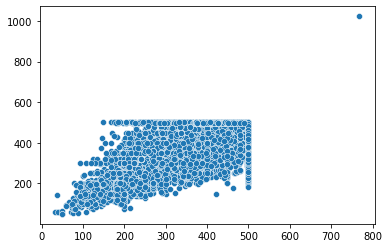

In [20]:
sns.scatterplot(x=x,y=y)


In [21]:
np.mean(x)

356.46712

In [22]:
np.mean(y)

410.52264

In [23]:
image_shape = (256,256,3)
#böyle bir optimizasyon yapilmis 256 ile

In [24]:
# help(ImageDataGenerator)

**Image Manipulation**

We can use the ImageDataGenerator to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. ImageDataGenerator does the followings.

* Accepts a batch of images used for training.
* Applies a series of random transformations to each image in the batch.
* Replaces the original batch with randomly transformed batch.
* Training the CNN on this randomly transformed batch.

The goal of applying data augmentation is to have a more generalized model.

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

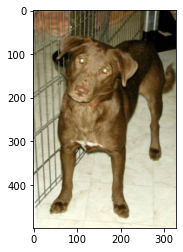

In [27]:
plt.imshow(image_gen.random_transform(dog_img))

image_gen.flow_from_directory(train_path)

In [28]:
image_gen.flow_from_directory(val_path)

Found 2290 images belonging to 2 classes.


In [29]:
image_gen.flow_from_directory(test_path)

Found 0 images belonging to 0 classes.


# Creating the Model

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization

In [31]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
          
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())


model.add(Dense(128, activation='relu'))


model.add(Dense(1, activation='sigmoid')) #kedi mi degil mi tarzi sonuclar olddugu icin sigmoid,data kedi ve köpekti sadece

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#burda da bir önceki notebook'a benzer seyler yaptik              

2022-03-16 18:02:52.209610: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-16 18:02:52.847545: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38394 MB memory:  -> device: 0, name: A100-SXM4-40GB, pci bus id: 0000:00:04.0, compute capability: 8.0


In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 128)     73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 123, 123, 128)     147584    
                                                                 
 conv2d_3 (Conv2D)           (None, 121, 121, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 60, 60, 128)      0         
 2D)                                                    

## Early Stopping

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [35]:
batch_size = 32

In [36]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=(256,256),
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary', shuffle=True)

Found 17526 images belonging to 2 classes.


In [37]:
val_image_gen = image_gen.flow_from_directory(val_path,
                                               target_size=(256,256),
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=True)

Found 2290 images belonging to 2 classes.


In [38]:
train_image_gen.class_indices

{'cat': 0, 'dog': 1}

## Model Training

In [39]:
STEP_SIZE_TRAIN=train_image_gen.n//train_image_gen.batch_size
STEP_SIZE_VAL=val_image_gen.n//val_image_gen.batch_size

In [40]:
STEP_SIZE_TRAIN, STEP_SIZE_VAL

(547, 71)

In [41]:
results = model.fit(train_image_gen,epochs=20,
                    validation_data=val_image_gen,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_steps=STEP_SIZE_VAL,
                    callbacks=[early_stop])

Epoch 1/20


2022-03-16 18:02:56.099341: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8201
2022-03-16 18:02:58.492177: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


547/547 [==============================] - 290s 522ms/step - loss: 0.6051 - accuracy: 0.7129 - val_loss: 0.7204 - val_accuracy: 0.5304
Epoch 2/20
547/547 [==============================] - 285s 522ms/step - loss: 0.5931 - accuracy: 0.7131 - val_loss: 0.7497 - val_accuracy: 0.5335
Epoch 3/20
547/547 [==============================] - 286s 522ms/step - loss: 0.5864 - accuracy: 0.7128 - val_loss: 0.7120 - val_accuracy: 0.5357
Epoch 4/20
547/547 [==============================] - 286s 523ms/step - loss: 0.5635 - accuracy: 0.7147 - val_loss: 0.6945 - val_accuracy: 0.5361
Epoch 5/20
547/547 [==============================] - 287s 525ms/step - loss: 0.5088 - accuracy: 0.7565 - val_loss: 0.5583 - val_accuracy: 0.7192
Epoch 6/20
547/547 [==============================] - 286s 523ms/step - loss: 0.4485 - accuracy: 0.7953 - val_loss: 0.5061 - val_accuracy: 0.7496
Epoch 7/20
547/547 [==============================] - 285s 521ms/step - loss: 0.4229 - accuracy: 0.8111 - val_loss: 0.5237 - val_accura

# Evaluating the Model

In [42]:
summary = pd.DataFrame(model.history.history)
summary.head()

loss  accuracy  val_loss  val_accuracy
0  0.605052  0.712930  0.720395      0.530370
1  0.593084  0.713102  0.749688      0.533451
2  0.586356  0.712816  0.711991      0.535651
3  0.563504  0.714702  0.694507      0.536092
4  0.508828  0.756545  0.558258      0.719190

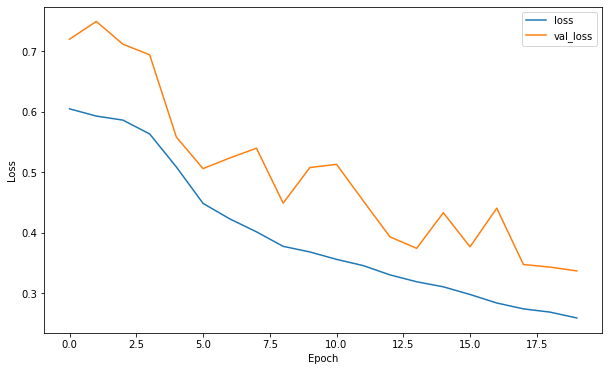

In [43]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

#burda biraz overfitting var diyyebiliriz

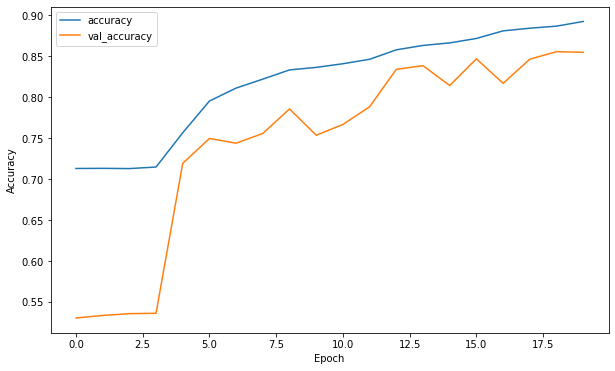

In [44]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

#genelde ilk asamalarda pek yakalayamiyorlar, baslangiclari farkli aliyorlar, 
# sebebei val_accuracnin ilk batcten sonra digerinin basta aldiginda dolayi oldugunu söylüyorlar

In [45]:
model.metrics_names

['loss', 'accuracy']

In [46]:
model.evaluate(val_image_gen,
steps=STEP_SIZE_VAL)



71/71 [==============================] - 33s 464ms/step - loss: 0.3347 - accuracy: 0.8530


[0.33466219902038574, 0.8529929518699646]

In [74]:
val_image_gen = image_gen.flow_from_directory(val_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False, seed=42)
#                                                

Found 2290 images belonging to 2 classes.


In [75]:
pred_probabilities = model.predict(val_image_gen)

In [76]:
pred_probabilities

array([[0.10673191],
       [0.51131946],
       [0.18750179],
       ...,
       [0.99868566],
       [0.9653855 ],
       [0.9958806 ]], dtype=float32)

In [91]:
val_image_gen.classes[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [92]:
predictions = pred_probabilities > 0.5

In [93]:
predictions[:50]

#hangilerini bilip bilmedigini gösteriyor

array([[False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

In [94]:
from sklearn.metrics import classification_report,confusion_matrix

In [95]:
print(classification_report(val_image_gen.classes,predictions))
#sonuclar genelde iyi gibi

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1219
           1       0.84      0.84      0.84      1071

    accuracy                           0.85      2290
   macro avg       0.85      0.85      0.85      2290
weighted avg       0.85      0.85      0.85      2290



In [96]:
confusion_matrix(val_image_gen.classes,predictions)

array([[1051,  168],
       [ 176,  895]])

In [97]:
from tensorflow.keras.models import load_model
model.save('cat_dog_detector.h5')

# Predicting on an Image

In [98]:
from tensorflow.keras.preprocessing import image

In [99]:
model=load_model('cat_dog_detector.h5')

In [100]:
#from PIL import Image

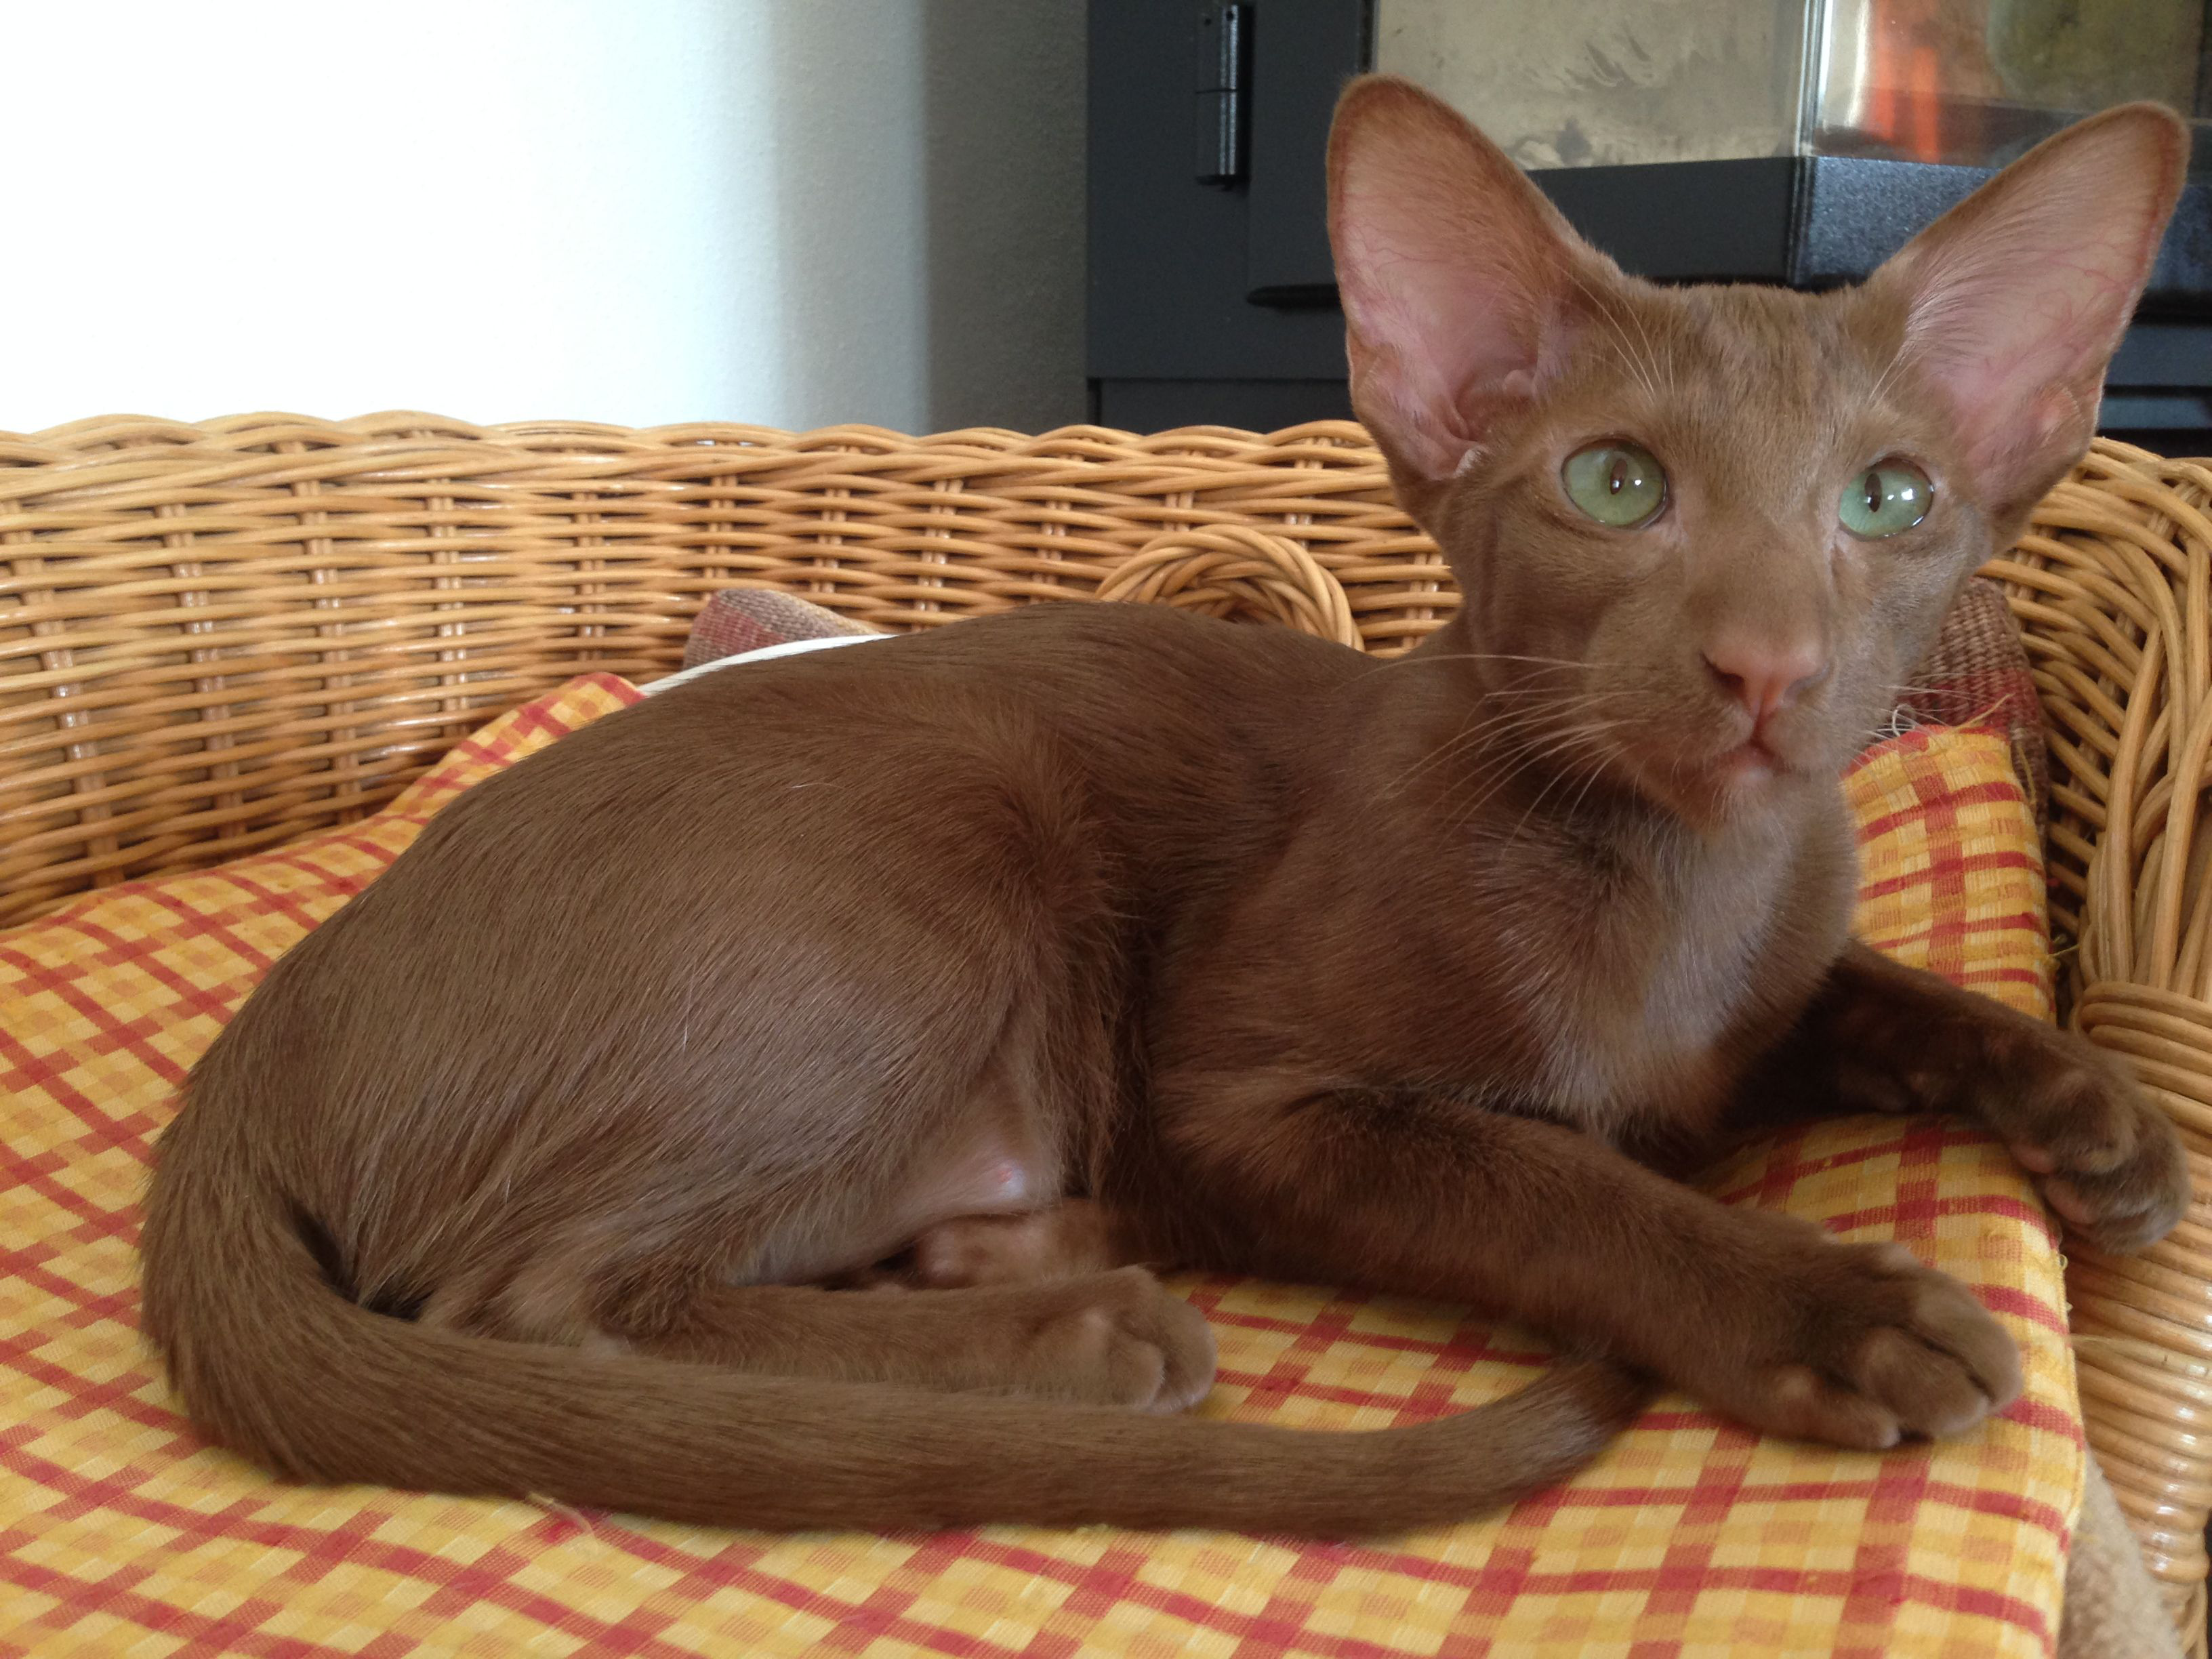

In [101]:
img=image.load_img('iu.jpeg')
img
#kendi data setinde olmayan bir foto

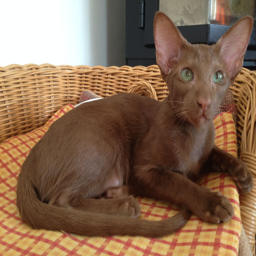

In [102]:
resized_img = img.resize((256, 256))
resized_img

In [103]:
resized_img1=np.array(resized_img)
resized_img1.shape

(256, 256, 3)

In [104]:
resized_img1=np.expand_dims(resized_img1, axis=0)
resized_img1.shape

(1, 256, 256, 3)

In [105]:
model.predict(resized_img1).round()
#buna kedi diyor
#belki image generater tarafinda fotolarin bir yerlerini büyüterek kendisini biraz daha genis yelpazeli tahmin yapmasini saglamis

array([[0.]], dtype=float32)

In [106]:
val_image_gen.class_indices

{'cat': 0, 'dog': 1}

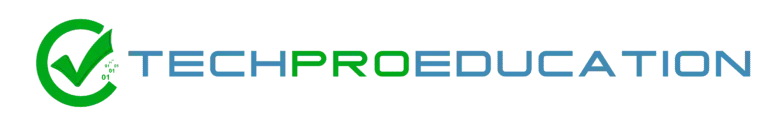